In [76]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from utils  import merge_multiple_tables
import os

pd.set_option('display.max_rows', 200)

### Analyzing cheapest and most expensive day of week

To start out, I am going to plot ticket prices for one random selected week with random input variables.

In [77]:
route='berlin-memmingen'
age='E'
discount='2'
tariffClass='2'
path=f'data/{route}/data_{age}_{discount}_{tariffClass}_copy'

In [78]:
df = merge_multiple_tables(path)
df.shape

(996, 12)

In [79]:
df['time'].nunique()

57

In [69]:
def plot_for_ticket_type(df, ticket_type):
    ticket_type = ticket_type
    df_ticket = df.loc[df['ticket type'] == ticket_type]

    df_ticket['weekday'] = df_ticket['datetime dep'].dt.day_name()

    df_ticket = df_ticket.sort_values(by=['time'])


    plt = sb.scatterplot(data=df_ticket, x='time', y='price', hue='weekday', s=8)
    plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
    plt.tick_params(labelsize=5)
    sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

/tmp/ipykernel_602442/2071454251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticket['weekday'] = df_ticket['datetime dep'].dt.day_name()
/tmp/ipykernel_602442/2071454251.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


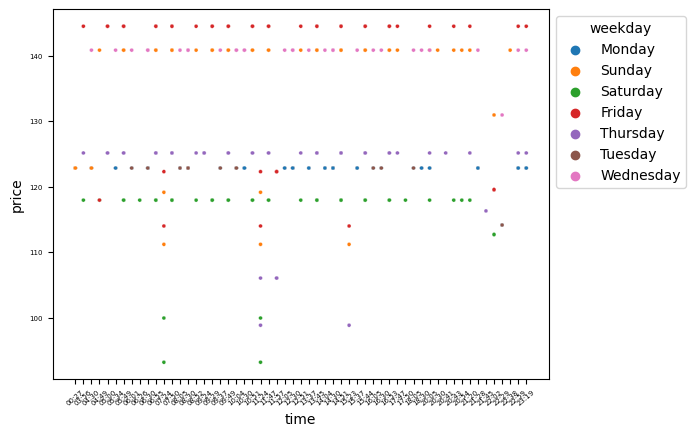

In [70]:
plot_for_ticket_type(df, 'Flexpreis Plus')

/tmp/ipykernel_602442/2071454251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticket['weekday'] = df_ticket['datetime dep'].dt.day_name()
/tmp/ipykernel_602442/2071454251.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


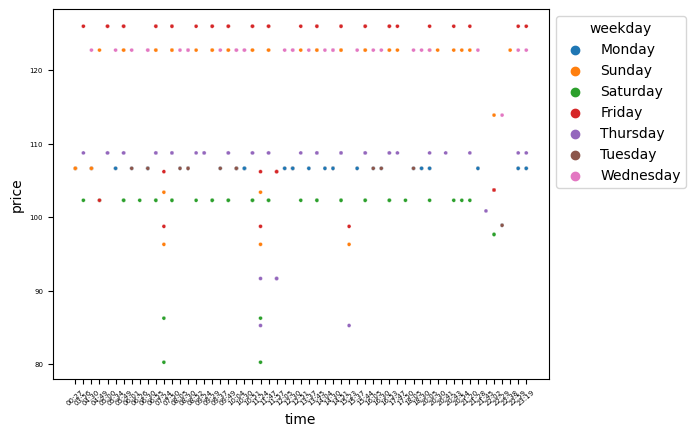

In [72]:
plot_for_ticket_type(df, 'Flexpreis')

/tmp/ipykernel_602442/2071454251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticket['weekday'] = df_ticket['datetime dep'].dt.day_name()
/tmp/ipykernel_602442/2071454251.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


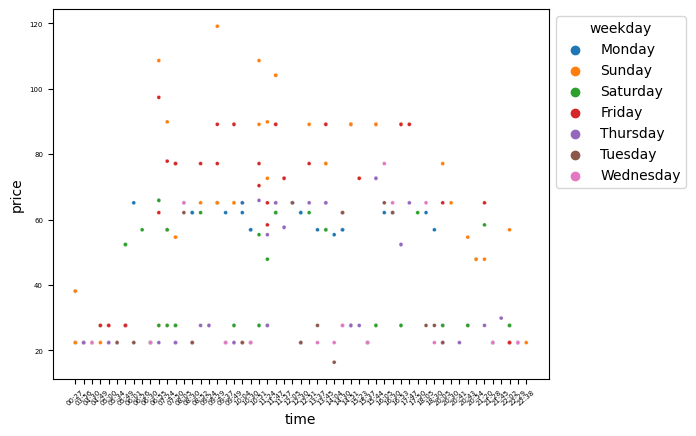

In [73]:
plot_for_ticket_type(df, 'Sparpreis')

/tmp/ipykernel_602442/2071454251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticket['weekday'] = df_ticket['datetime dep'].dt.day_name()
/tmp/ipykernel_602442/2071454251.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


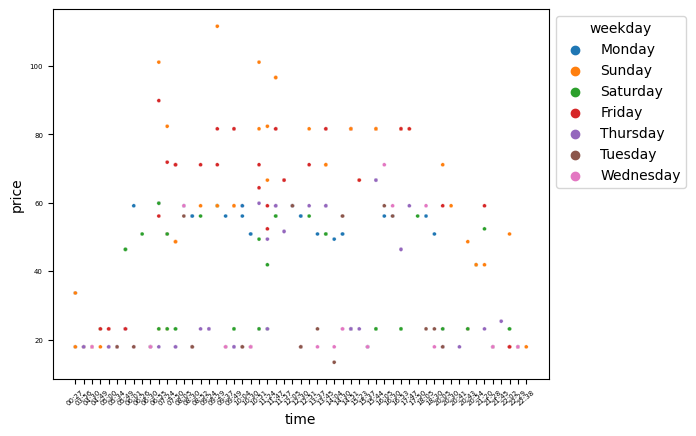

In [74]:
plot_for_ticket_type(df, 'Super Sparpreis')

For the Flexpreis and Flexpreis Plus ticket we can see a bit of a pattern which is not the case for the Sparpreis and Super Sparpreis tickets. 
To find out more about the behaviour of the flexprices I am going to plot them over a longer period of time.